In [4]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# imports for time series analysis
from statsmodels.tsa.seasonal import MSTL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# imports for time series forecasting
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
#from sktime.performance_metrics.forecasting import *
from sktime.forecasting.naive import NaiveForecaster

# call ARIMA (includes sarima/sarimax) model
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings("ignore")

# load inflow dataset into dataframe
#inflow_data = pd.read_excel("../InflowData_1.xlsx")
inflow_data = pd.read_csv("../data/inflow_imputed.csv")

# make list with dma names
dma_list = list(inflow_data.columns.values[1:])

# male list with dma description
dma_descripton = ["Hospital district",
                   "Residential district in the countryside",
                   "Residential district in the countryside",
                   "Suburban residential/commercial district",
                   "Residential/commercial district close to the city centre",
                   "Suburban district including sport facilities and office buildings",
                   "Residential district close to the city centre",
                   "City centre district",
                   "Commercial/industrial district close to the port",
                   "Commercial/industrial district close to the port"]

# make list with information of users supplied
users_supplied = [162,531,607,2094,7955,1135,3180,2901,425,776]

# make list with average net inflow
av_net_inflo = [8.4,9.6,4.3,32.9,78.3,8.1,25.1,20.8,20.6,26.4]

# change index of inflow dataframe to time step
inflow_data = inflow_data.set_index('Date-time CET-CEST (DD/MM/YYYY HH:mm)')

# change index format to datetime
#inflow_data.index = pd.to_datetime(inflow_data.index, format="%d/%m/%Y %H:%M")
inflow_data.index = pd.to_datetime(inflow_data.index)

# # print first two rows
# inflow_data.head(3)

In [5]:
# create an utility metric function
def print_metrics(y_obs,y_pred, model_name,return_df=None):
    MeanAE_24h = 1/24 * np.sum(np.abs(y_obs[0:24] - y_pred[0:24]))

    MaxAE_24h = np.max(np.abs(y_obs[0:24] - y_pred[0:24]))

    MeanAE_144h = 1/144 * np.sum(np.abs(y_obs[24:168] - y_pred[24:168]))

    total_sum = np.sum(MeanAE_24h + MaxAE_24h + MeanAE_144h)

    dict_ = {'MeanAE-24h': MeanAE_24h, 'MaxAE-24h': MaxAE_24h,
             'MeanAE-144h': MeanAE_144h, 'Total': total_sum}
    
    df = pd.DataFrame(dict_, index = [model_name])
    
    print(model_name)
    print(f"MeanAE-24h      MaxAE-24h      MeanAE-144h      Total")
    print(f"{MeanAE_24h:.2f}            {MaxAE_24h:.2f}             {MeanAE_144h:.2f}           {total_sum:.2f} \n")
    if return_df == 1:
        return(df.round(decimals = 3))

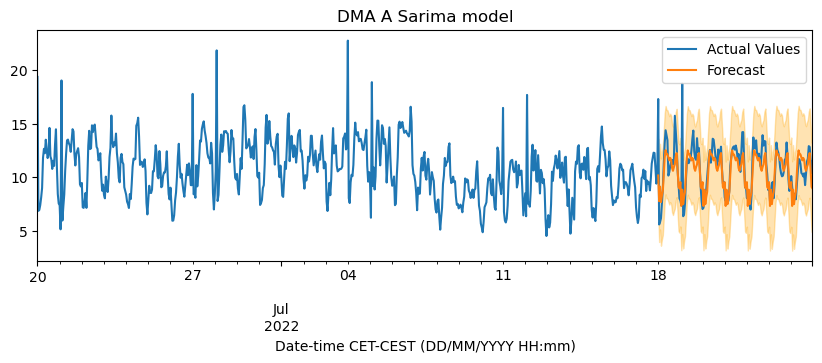

Performance indicators
DMA A Sarima 4-Week
MeanAE-24h      MaxAE-24h      MeanAE-144h      Total
1.53            7.12             0.91           9.57 

Naive Forecaster
MeanAE-24h      MaxAE-24h      MeanAE-144h      Total
2.40            6.55             1.72           10.67 



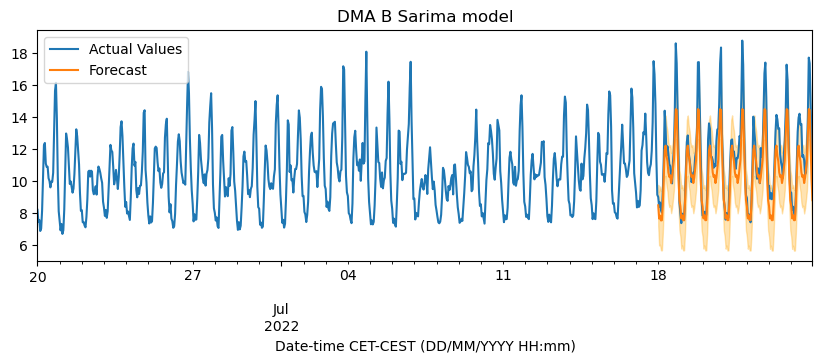

Performance indicators
DMA B Sarima 4-Week
MeanAE-24h      MaxAE-24h      MeanAE-144h      Total
1.07            4.10             1.07           6.24 

Naive Forecaster
MeanAE-24h      MaxAE-24h      MeanAE-144h      Total
2.22            8.16             2.25           12.64 



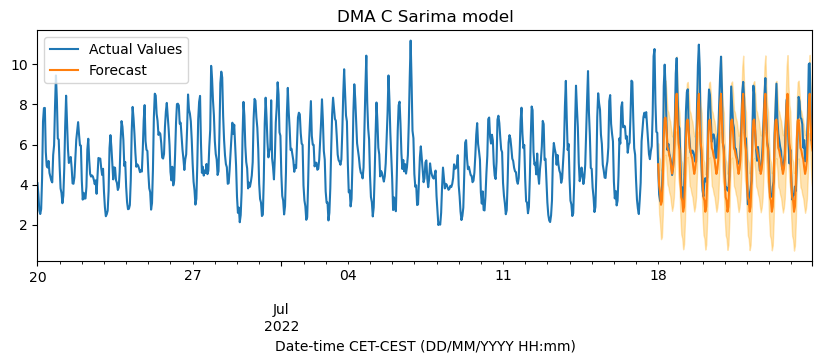

Performance indicators
DMA C Sarima 4-Week
MeanAE-24h      MaxAE-24h      MeanAE-144h      Total
0.75            2.69             0.73           4.16 

Naive Forecaster
MeanAE-24h      MaxAE-24h      MeanAE-144h      Total
1.75            4.92             1.52           8.20 



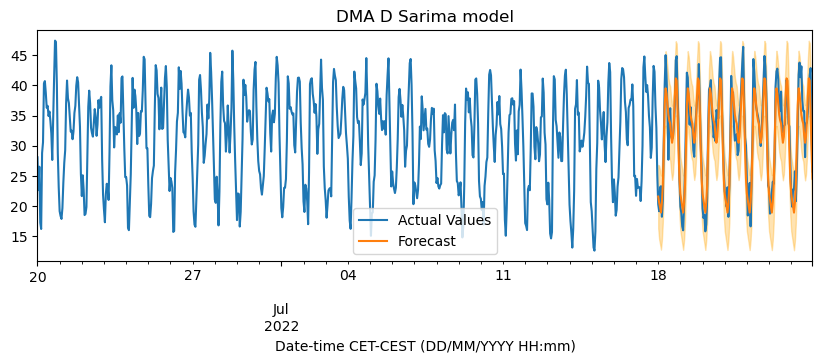

Performance indicators
DMA D Sarima 4-Week
MeanAE-24h      MaxAE-24h      MeanAE-144h      Total
2.31            7.42             2.35           12.08 

Naive Forecaster
MeanAE-24h      MaxAE-24h      MeanAE-144h      Total
6.79            13.65             6.69           27.12 



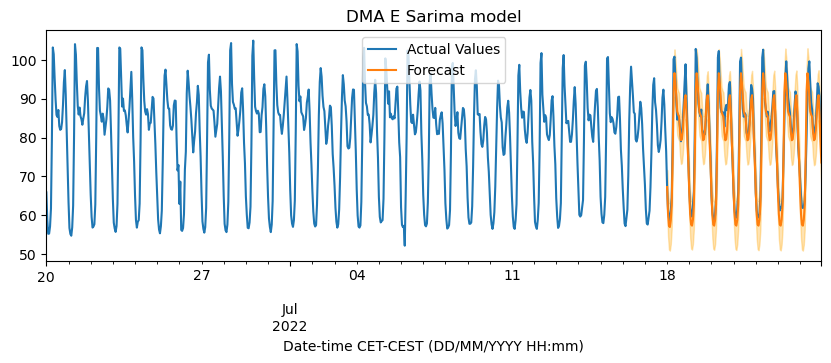

Performance indicators
DMA E Sarima 4-Week
MeanAE-24h      MaxAE-24h      MeanAE-144h      Total
2.44            8.25             2.64           13.33 

Naive Forecaster
MeanAE-24h      MaxAE-24h      MeanAE-144h      Total
10.85            21.31             10.55           42.71 



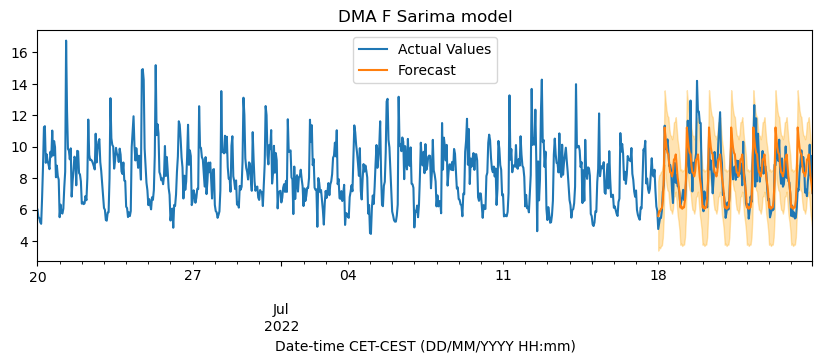

Performance indicators
DMA F Sarima 4-Week
MeanAE-24h      MaxAE-24h      MeanAE-144h      Total
0.55            2.01             0.96           3.52 

Naive Forecaster
MeanAE-24h      MaxAE-24h      MeanAE-144h      Total
1.45            3.46             1.37           6.29 



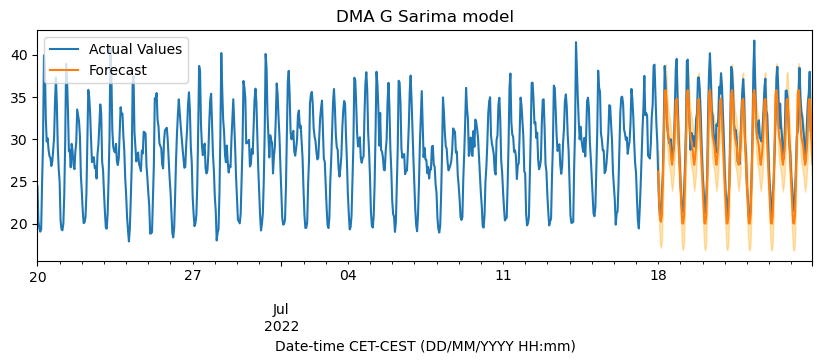

Performance indicators
DMA G Sarima 4-Week
MeanAE-24h      MaxAE-24h      MeanAE-144h      Total
1.44            4.74             1.91           8.08 

Naive Forecaster
MeanAE-24h      MaxAE-24h      MeanAE-144h      Total
4.27            11.09             4.59           19.95 



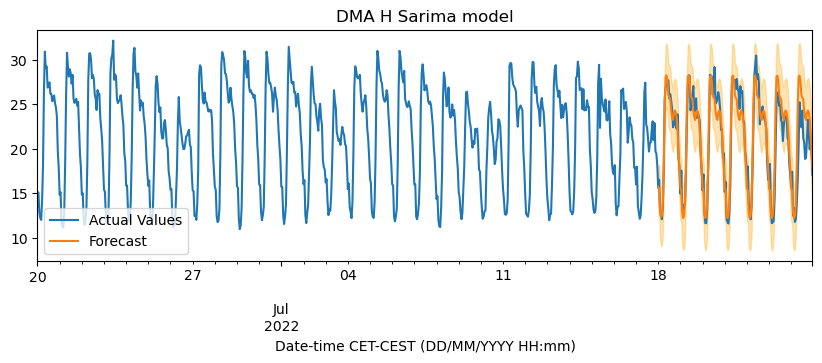

Performance indicators
DMA H Sarima 4-Week
MeanAE-24h      MaxAE-24h      MeanAE-144h      Total
0.75            2.04             1.46           4.25 

Naive Forecaster
MeanAE-24h      MaxAE-24h      MeanAE-144h      Total
4.49            9.41             4.49           18.39 



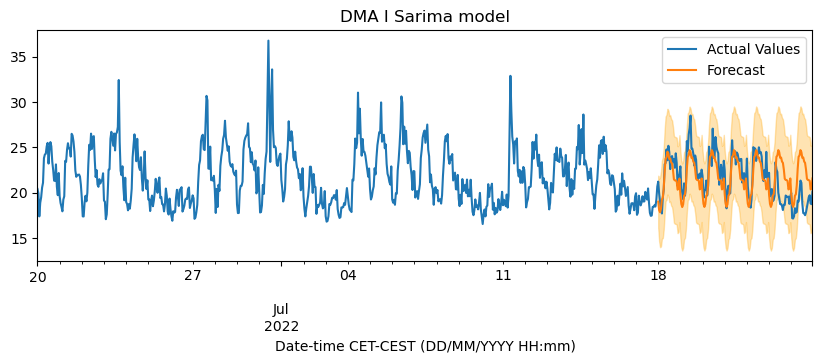

Performance indicators
DMA I Sarima 4-Week
MeanAE-24h      MaxAE-24h      MeanAE-144h      Total
1.07            3.00             1.70           5.77 

Naive Forecaster
MeanAE-24h      MaxAE-24h      MeanAE-144h      Total
1.89            4.07             2.16           8.11 



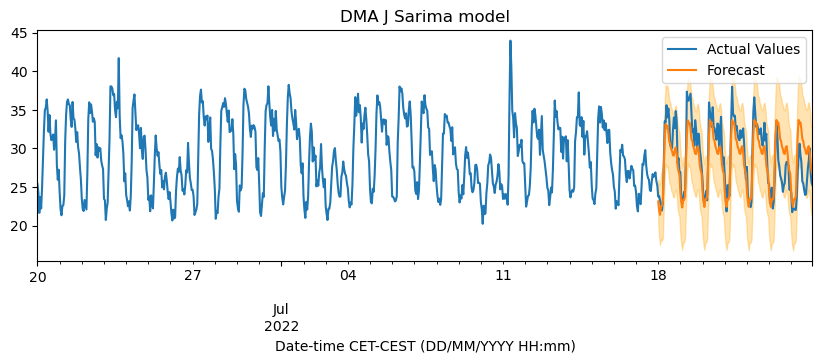

Performance indicators
DMA J Sarima 4-Week
MeanAE-24h      MaxAE-24h      MeanAE-144h      Total
1.74            4.94             2.05           8.73 

Naive Forecaster
MeanAE-24h      MaxAE-24h      MeanAE-144h      Total
4.07            7.01             3.72           14.80 



In [6]:
# define start and end dates for analysis (last week is used for evaluation)
start = '2022-06-20'
end = '2022-07-24'

# make empty datafram to store results
results_df = pd.DataFrame()

# make dictionary with dma position in description list
dict_dma = dict(zip(dma_list, np.arange(0,len(dma_list))))

# select dma for analysis
for dma in list(inflow_data.columns):

    # copy data from dataframe in a new time series dataframe
    tseries_df = inflow_data[dma][start:end].copy()

    # fill missing values with interpolation technique
    #tseries_df.interpolate(limit_direction='both',inplace=True)

    # # plot original and interpolated time series for selected dma
    # fig, ax = plt.subplots()
    # tseries_df.plot(label='Interpolated')
    # inflow_data[dma][start:end].plot(y=dma_list[i],use_index=True,ax = ax,figsize=(25,5), linewidth=1, label='Original')
    # plt.title(dma_list[dict_dma[dma]] + ". " + dma_descripton[dict_dma[dma]] +". "+ str(users_supplied[dict_dma[dma]]) + " users supplied. ")
    # plt.xlabel("Date")
    # plt.ylabel("L/s")
    # plt.legend()
    # plt.show()

    # make array format for analysis
    y = tseries_df

    # define train and test sets
    y_train, y_test = temporal_train_test_split(y, test_size = 168)

    #Naive Forecaster
    fh = ForecastingHorizon(y_test.index, is_relative=False)
    forecaster = NaiveForecaster(strategy = 'mean')
    forecaster.fit(y_train)
    # results of naive forecaster
    y_pred_naive = forecaster.predict(fh)

    # #print results (optional)
    # fig, ax = plt.subplots(figsize = (10,3))
    # tseries_df.plot(title = 'Naive Forecaster', ax = ax)
    # y_pred_naive.plot(ax = ax)
    # ax.legend(['Actual Values', 'Forecast'])
    # plt.show()

    # implement sarima model
    # the statsmodel package applies the difference already if needed.
    model = ARIMA(y_train, order=(2,0,0), seasonal_order=(0,1,1,24)) # add seasonality of 24 hrs
    model_fit = model.fit()
    # print(model_fit.summary())

    y_pred = model_fit.get_forecast(len(y_test)).summary_frame(alpha=0.05)

    fig, ax = plt.subplots(figsize = (10,3))
    tseries_df.plot(title = dma[:5]+' Sarima model', ax = ax)
    y_pred.plot(y='mean',ax = ax)
    ax.fill_between(y_pred.index, y_pred['mean_ci_lower'], y_pred['mean_ci_upper'],color='orange', alpha=0.3)
    ax.legend(['Actual Values', 'Forecast'])
    plt.show()

    print('Performance indicators')
    df = print_metrics(y_test, y_pred['mean'], dma[:5]+' Sarima 4-Week',return_df=1)
    results_df = pd.concat([results_df, df])
    print_metrics(y_test, y_pred_naive, 'Naive Forecaster')

In [7]:
results_df

,MeanAE-24h,MaxAE-24h,MeanAE-144h,Total
DMA A Sarima 4-Week,1.532,7.121,0.913,9.565
DMA B Sarima 4-Week,1.074,4.104,1.067,6.244
DMA C Sarima 4-Week,0.746,2.687,0.731,4.164
DMA D Sarima 4-Week,2.313,7.415,2.348,12.077
DMA E Sarima 4-Week,2.439,8.251,2.640,13.330
DMA F Sarima 4-Week,0.554,2.011,0.960,3.524
DMA G Sarima 4-Week,1.436,4.736,1.911,8.083
DMA H Sarima 4-Week,0.753,2.038,1.462,4.252
DMA I Sarima 4-Week,1.069,2.998,1.704,5.771
DMA J Sarima 4-Week,1.741,4.940,2.051,8.732


In [8]:
print(f"{results_df['Total'].sum() :.2f}")

75.74


In [9]:
print(f"{results_df.drop('DMA E Sarima 4-Week')['Total'].sum() :.2f}")

62.41
